<a href="https://colab.research.google.com/github/SafaeELMIRI/ItemsCatalog/blob/main/Quantum_Computing_Simon's_ELMIRI_Safae.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Introduction to Quantum Computing:
Quantum computing is a fascinating field that relies on the principles of quantum mechanics to perform calculations and solve problems in a very different way from classical computing. Unlike classical bits, which can be either 0 or 1, quantum bits (qubits) can exist in a superposition state, simultaneously combining the 0 and 1 states. Moreover, they can be entangled, allowing for parallel operations and complex calculations.
# the quantum algorithm
**Quantum algorithms** are designed to be executed on quantum computers, which harness the quantum properties of matter at the atomic scale to perform calculations. Unlike classical computers that use bits (0 and 1) for information processing, quantum computers use qubits, which can be in a state of 0, 1, or a superposition of these states. This characteristic allows quantum computers to perform certain operations much more efficiently than classical computers for specific tasks.

**Here are some of the best-known quantum algorithms:**

**Simon’s algorithm**

Simon’s algorithm is not a very influential quantum algorithm like Shor’s or Grover’s. It is a toy algorithm with almost no application in the general sense. Nevertheless, it was the first algorithm to show exponential speedup compared to the classical algorithm to solve this problem. Moreover, it inspired the development of algorithms like the Quantum Fourier Transform, a key element of Shor’s algorithm for prime factorization.

**Simon’s Problem**

Suppose we have a 2:1 function (i.e., a function that maps 2 different inputs to one output). This function takes  {0,1}^n  bits as input and produce {0,1}^n bits as output such that the output

f(x) = f(x ⊕ s) (⊕ means bitwise X-OR)

where s is also of {0,1}^n bits. We need to find the arbitrary bitstring ‘s’.

**The classical technique of finding s**

As the function is 2:1, we get 1 output for 2 inputs, for 2^(n) inputs there are 2^(n)/2 or 2^(n-1) unique outputs. Now, suppose x and y map the same output z such that x ⊕ y = z. In the worst case, we will have to check 2^(n-1)+1 outputs to find x and y, and by doing bit-wise X-OR of x and y, we will get z.

**The quantum solution**

The quantum circuit that implements Simon's algorithm is shown below.
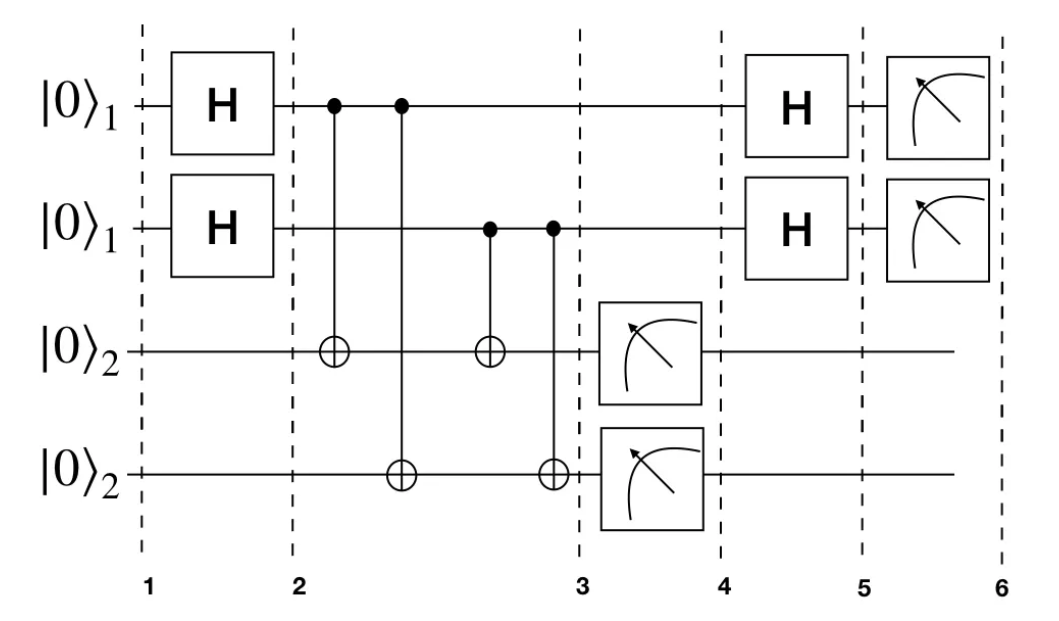

**Mathematical explanation:**

We can go step by step and see how the circuit works. Let us consider we have n qubits.

**STEP-1:** We have two registers at state |0⟩^n.

**STEP-2:** We apply H-gate on the qubits of the first register and get 2^n states of equal superposition.

Here |x⟩ is all 2^n possible bit-strings of equal superposition.

**STEP-3:** After applying the oracle function on both registers, we get |x⟩ on the first register and |y ⊕ f(x)⟩ on the second register. As |y⟩ =|0⟩, we get only |f(x)⟩ on the second register.

**STEP-4:** We measure the qubits of the second register. Here we will get a state |f(z)⟩ on the second register and the first register superposition of two inputs |z ⟩ and |z ⊕ s⟩ that can produce f(z). The s here is our arbitrary bit-string.

From now we will not need the value of the second register, |f(z)⟩.

**STEP-5:** At this stage, we apply H-gate on the first register. And we get an ugly formula like this.

The formula shows y(z ⊕ s) in the second exponent, equal to y·z ⊕ y·s. If y·s = 1, the value of the whole thing will be 0. We will get values only where y·s = 0 mod(2) with equal superposition. (x = y mod(z) means if x is divided by z, y will be the remainder).

**STEP-6:** In our final step, we measure our first register repeatedly to get different values of y from which we can calculate the s.

**Mathematical example:**

An example will give a clear intuition of the algorithm.

Let us do an example with three qubits. We consider 101 as the hidden bit string (s). We take the state 000 and use bitwise X-OR with 101 and get the value 101. So, 000 and 101 will share the same output. We can make an input and output chart following the above rule. We can freely select any three-bit output for each pair.

*Now let us go step by step.*

**1.** We initialize two registers in the |000⟩ state.

**2.** We use H-gate on qubits of the first register.

Which is equal to:

**3.** Here we apply our function that maps |x>|0> to |x>|f(x)>.

**4.** We measure our second register. And consider that we got the value |000> as output.

Now we have state |010> + |111> with equal superposition in our first register because we chose state |000> to be our output for |010> and |111>.

**5.** We apply H-gate on the first register again. After some ugly mathematics, we get the following value.

If we want to ensure our resulting states are correct, we can use y·s = 0 mod (2) to check it. Let us take the state |111>.

We get 0 because if we divide 2 by 2, we get 1 as the quotient and 0 as the remainder. And here remainder is our answer which is 0.

**6.** We will measure the first register repeatedly to get different resulting states. From those states, we can find s.

Suppose measuring for the first time, we got (010).

We measure the first register again and consider that we have got (111).

If 1·s1 = 1·s2 = 0 we get a trivial result 000 which does not make sense. But if 1·s1 = 1·s2 we get 101 which is our considered secret bit string.

**Implementing the algorithm in Qiskit:**



In [12]:
!pip install qiskit

In [5]:
from qiskit import QuantumRegister, ClassicalRegister, QuantumCircuit, Aer, assemble
from qiskit.visualization import plot_histogram
from qiskit.compiler import assemble

# considering our bit string to be ‘101’
b = "101"
n = len(b)
# creating two quantum register of ’n’ qubits and 1 classical register of ’n’ qubits
q_reg1 = QuantumRegister(n, "reg1")
q_reg2 = QuantumRegister(n, "reg2")
c_reg = ClassicalRegister(n)
circuit = QuantumCircuit(q_reg1, q_reg2, c_reg)
# applying H-gate on qubits of first register
circuit.h(q_reg1)
circuit.barrier()
# copying the data of the first register to the second register
circuit.cx(q_reg1, q_reg2)
circuit.barrier()
# applying bit-wise X-OR from register 1 to register 2 where qubit of the first register is 1
circuit.cx(q_reg1[0], q_reg2[0])
circuit.cx(q_reg1[0], q_reg2[2])
circuit.barrier()
# measuring qubits of the second register
circuit.measure(q_reg2, c_reg)
# applying H-gate to qubits of the first register
circuit.h(q_reg1)
circuit.barrier()
# measuring qubits of the first register
circuit.measure(q_reg1, c_reg)
circuit.draw()


┌───┐ ░                 ░            ░ ┌───┐       ░ ┌─┐      
reg1_0: ┤ H ├─░───■─────────────░───■────■───░─┤ H ├───────░─┤M├──────
        ├───┤ ░   │             ░   │    │   ░ ├───┤       ░ └╥┘┌─┐   
reg1_1: ┤ H ├─░───┼────■────────░───┼────┼───░─┤ H ├───────░──╫─┤M├───
        ├───┤ ░   │    │        ░   │    │   ░ ├───┤       ░  ║ └╥┘┌─┐
reg1_2: ┤ H ├─░───┼────┼────■───░───┼────┼───░─┤ H ├───────░──╫──╫─┤M├
        └───┘ ░ ┌─┴─┐  │    │   ░ ┌─┴─┐  │   ░ └┬─┬┘       ░  ║  ║ └╥┘
reg2_0: ──────░─┤ X ├──┼────┼───░─┤ X ├──┼───░──┤M├────────░──╫──╫──╫─
              ░ └───┘┌─┴─┐  │   ░ └───┘  │   ░  └╥┘ ┌─┐    ░  ║  ║  ║ 
reg2_1: ──────░──────┤ X ├──┼───░────────┼───░───╫──┤M├────░──╫──╫──╫─
              ░      └───┘┌─┴─┐ ░      ┌─┴─┐ ░   ║  └╥┘┌─┐ ░  ║  ║  ║ 
reg2_2: ──────░───────────┤ X ├─░──────┤ X ├─░───╫───╫─┤M├─░──╫──╫──╫─
              ░           └───┘ ░      └───┘ ░   ║   ║ └╥┘ ░  ║  ║  ║ 
  c0: 3/═════════════════════════════════════════╩═══╩══╩═════╩══╩══╩═
                                                 0   1  2     0  1  2

In [13]:
!pip install qiskit-aer

<ipython-input-8-ccc1d233a1b2>:4: DeprecationWarning: Using a qobj for run() is deprecated as of qiskit-aer 0.9.0 and will be removed no sooner than 3 months from that release date. Transpiled circuits should now be passed directly using `backend.run(circuits, **run_options).
  result = qasm_sim.run(job).result()


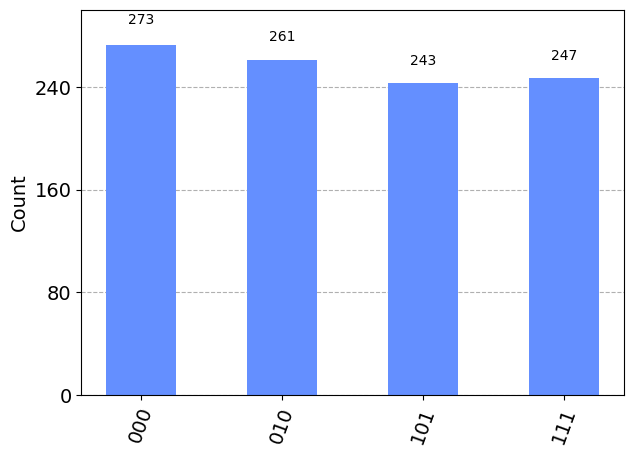

In [8]:
# running the circuit using "qasm simulator"
qasm_sim = Aer.get_backend("qasm_simulator")
job = assemble(circuit,qasm_sim)
result = qasm_sim.run(job).result()
counts = result.get_counts()
plot_histogram(counts)

Here, we get 4 values with equal probability. Which are 000, 010, 101, and 111, and these are the final values we finally got from our mathematical example.

If we want to be sure if the obtained states satisfy y·s = 0 or not, we can also write a code for that.


In [15]:
# Calculate the dot product of the results
def bdotz(b, z):
    accum = 0
    for i in range(len(b)):
        accum += int(b[i]) * int(z[i])
    return (accum % 2)

for z in counts:
    print('{} = {} (mod 2)'.format(bdotz(b, z), bdotz(b, z)))

0 = 0 (mod 2)
0 = 0 (mod 2)
0 = 0 (mod 2)
0 = 0 (mod 2)


From the above result, we can see that for all the values y·s = 0. So, our resulting states are correct.

Now from these four resulting states, we can find our arbitrary bit-string ‘101’ following the given method on the example.

Moreover, if we do not want to code for the oracle, we can use the Qiskit textbook function for Simon’s oracle.

**Moreover, if we do not want to code for the oracle, we can use the Qiskit textbook function for Simon’s oracle.**



In [17]:
!pip install qiskit_textbook

ERROR: Could not find a version that satisfies the requirement qiskit_textbook (from versions: none)
ERROR: No matching distribution found for qiskit_textbook


In [16]:
from qiskit_textbook.tools import simon_oracle
b = '101'
n = len(b)
simon_circuit = QuantumCircuit(n*2, n)
simon_circuit.h(range(n))
simon_circuit.barrier()
simon_circuit+=simon_oracle(b)
simon_circuit.barrier()
simon_circuit.h(range(n))
simon_circuit.measure(range(n), range(n))
simon_circuit.draw()

ModuleNotFoundError: ignored